In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
customer_profiles_df=pd.read_csv("./data/customer_profiles_table2.csv")
transactions_df=pd.read_csv("./data/transactions_df2.csv")
terminal_profiles_df=pd.read_csv("./data/terminal_profiles_table2.csv")

In [3]:
transactions_df

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,is_monday,...,hour_1_4,hour_2_4,hour_3_4,hour_4_4,average_tx_last1days,tx_count_over_last1days,average_tx_last7days,tx_count_over_last7days,average_tx_last30days,tx_count_over_last30days
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0,0,...,1,0,0,0,57.1600,1.0,57.160000,1.0,57.160000,1.0
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0,0,...,1,0,0,0,81.5100,1.0,81.510000,1.0,81.510000,1.0
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0,0,...,1,0,0,0,146.0000,1.0,146.000000,1.0,146.000000,1.0
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0,0,...,1,0,0,0,64.4900,1.0,64.490000,1.0,64.490000,1.0
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0,0,...,1,0,0,0,50.9900,1.0,50.990000,1.0,50.990000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437953,1437953,2018-08-28 23:57:18,1970,3790,4.07,12959838,149,0,0,0,...,0,0,0,1,4.7500,2.0,6.555000,8.0,5.930889,45.0
1437954,1437954,2018-08-28 23:57:29,3342,2150,64.86,12959849,149,0,0,0,...,0,0,0,1,54.1925,4.0,63.339500,20.0,57.190000,64.0
1437955,1437955,2018-08-28 23:57:49,1204,9915,45.50,12959869,149,0,0,0,...,0,0,0,1,47.8960,5.0,52.062222,9.0,56.692553,47.0
1437956,1437956,2018-08-28 23:58:05,2276,5115,1.76,12959885,149,0,0,0,...,0,0,0,1,5.9875,4.0,6.176154,26.0,5.981507,73.0


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
transactions_df.columns

Index(['TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID', 'TERMINAL_ID',
       'TX_AMOUNT', 'TX_TIME_SECONDS', 'TX_TIME_DAYS', 'TX_FRAUD',
       'TX_FRAUD_SCENARIO', 'is_monday', 'is_tuesday', 'is_wednesday',
       'is_thursday', 'is_friday', 'is_saturday', 'is_sunday', 'hour_1_4',
       'hour_2_4', 'hour_3_4', 'hour_4_4', 'average_tx_last1days',
       'tx_count_over_last1days', 'average_tx_last7days',
       'tx_count_over_last7days', 'average_tx_last30days',
       'tx_count_over_last30days'],
      dtype='object')

In [6]:
transactions_df.TX_FRAUD.value_counts()

0    1426112
1      11846
Name: TX_FRAUD, dtype: int64

In [7]:
X=transactions_df[['TX_AMOUNT', 'is_monday', 'is_tuesday', 'is_wednesday',
       'is_thursday', 'is_friday', 'is_saturday', 'is_sunday', 'hour_1_4',
       'hour_2_4', 'hour_3_4', 'hour_4_4', 'average_tx_last1days',
       'tx_count_over_last1days', 'average_tx_last7days',
       'tx_count_over_last7days', 'average_tx_last30days',
       'tx_count_over_last30days']]  # Features
y=transactions_df['TX_FRAUD'] 

In [8]:
#test sample represent 30% of the dataset
%time X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

CPU times: user 153 ms, sys: 31.7 ms, total: 185 ms
Wall time: 191 ms


In [9]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
%time clf.fit(X_train,y_train)

%time y_pred=clf.predict(X_test)

CPU times: user 4min 6s, sys: 812 ms, total: 4min 7s
Wall time: 4min 7s
CPU times: user 7.41 s, sys: 49.6 ms, total: 7.46 s
Wall time: 7.46 s


In [10]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
%time print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9940911661891383
CPU times: user 11.8 ms, sys: 1.13 ms, total: 12.9 ms
Wall time: 11.7 ms


# feature importance variable to see feature importance scores.
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [11]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

TX_AMOUNT                   0.320969
average_tx_last1days        0.170997
average_tx_last30days       0.163715
average_tx_last7days        0.154123
tx_count_over_last30days    0.068077
tx_count_over_last7days     0.048388
tx_count_over_last1days     0.028673
hour_2_4                    0.004909
hour_3_4                    0.004894
hour_1_4                    0.004387
is_thursday                 0.004169
is_tuesday                  0.004147
is_wednesday                0.004037
is_monday                   0.004036
is_sunday                   0.003997
is_friday                   0.003882
is_saturday                 0.003655
hour_4_4                    0.002943
dtype: float64

No handles with labels found to put in legend.


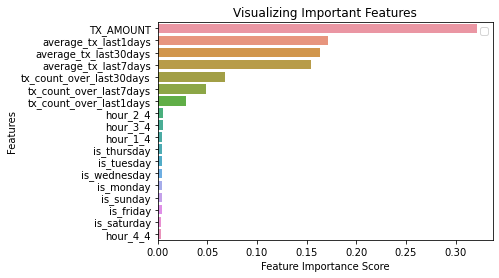

In [12]:
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [13]:
X

,TX_AMOUNT,is_monday,is_tuesday,is_wednesday,is_thursday,is_friday,is_saturday,is_sunday,hour_1_4,hour_2_4,hour_3_4,hour_4_4,average_tx_last1days,tx_count_over_last1days,average_tx_last7days,tx_count_over_last7days,average_tx_last30days,tx_count_over_last30days
0,57.16,0,0,0,0,0,0,1,1,0,0,0,57.1600,1.0,57.160000,1.0,57.160000,1.0
1,81.51,0,0,0,0,0,0,1,1,0,0,0,81.5100,1.0,81.510000,1.0,81.510000,1.0
2,146.00,0,0,0,0,0,0,1,1,0,0,0,146.0000,1.0,146.000000,1.0,146.000000,1.0
3,64.49,0,0,0,0,0,0,1,1,0,0,0,64.4900,1.0,64.490000,1.0,64.490000,1.0
4,50.99,0,0,0,0,0,0,1,1,0,0,0,50.9900,1.0,50.990000,1.0,50.990000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437953,4.07,0,1,0,0,0,0,0,0,0,0,1,4.7500,2.0,6.555000,8.0,5.930889,45.0
1437954,64.86,0,1,0,0,0,0,0,0,0,0,1,54.1925,4.0,63.339500,20.0,57.190000,64.0
1437955,45.50,0,1,0,0,0,0,0,0,0,0,1,47.8960,5.0,52.062222,9.0,56.692553,47.0
1437956,1.76,0,1,0,0,0,0,0,0,0,0,1,5.9875,4.0,6.176154,26.0,5.981507,73.0


In [14]:
#first try
prediction = X
%time tem_p = clf.predict(X)
prediction["prediction"] = tem_p

CPU times: user 20 s, sys: 135 ms, total: 20.1 s
Wall time: 20.2 s


<ipython-input-14-ea65ce8c26d3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction["prediction"] = tem_p


In [15]:
prediction_df = pd.DataFrame(tem_p, columns=["prediction"])


In [16]:
prediction_temp = []
for i in transactions_df["TX_FRAUD"]:
    prediction_temp.append(i)


In [17]:
prediction_temp= pd.DataFrame(prediction_temp, columns=["TX_FRAUD"])

In [19]:
#clf.predict(X.head())

In [20]:
result = pd.concat([prediction_df,prediction_temp],axis=1).reindex(prediction_temp.index)

In [21]:
result["false_positive"] = np.where((result["prediction"] == 1) &
                                   (result["TX_FRAUD"] == 0), 1,0)

result["fraud_missed"] = np.where((result["prediction"] == 0) &
                                   (result["TX_FRAUD"] == 1), 1,0 )

result["fraud_catch"] = np.where((result["prediction"] == result["TX_FRAUD"])&
                                   (result["TX_FRAUD"] == 1), 1,0)

result["good_tx"] = np.where((result["prediction"] == result["TX_FRAUD"])&
                                   (result["prediction"] == 0), 1,0)

result["correct_decision"] = np.where((result["prediction"] == result["TX_FRAUD"])|
                                      (result["prediction"] != result["TX_FRAUD"]), 1,0)

In [22]:
result.sum()

prediction             9274
TX_FRAUD              11846
false_positive            4
fraud_missed           2576
fraud_catch            9270
good_tx             1426108
correct_decision    1437958
dtype: int64

In [30]:
result.correct_decision.sum() / int(len(result.correct_decision))

1.0

In [32]:
int(len(result))

1437958

In [31]:
result.correct_decision.sum()

1437958

In [33]:
result.shape

(1437958, 7)